## Description

### Objective
- Preliminary Data Analysis.
- Explore the dataset and extract basic observations about the data.
- Come up with a customer profile (characteristics of a customer) of the different products
- Perform uni-variate and multi-variate analyses
- Generate a set of insights and recommendations that will help the company in targeting new customers

### Context
#### The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables:

- Product - the model no. of the treadmill
- Age - in no of years, of the customer
- Gender - of the customer
- Education - in no. of years, of the customer
- Marital Status - of the customer
- Usage - Avg. # times the customer wants to use the treadmill every week
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
- Income - of the customer
- Miles- expected to run

### Key Questions to be answered 
- what are the differences between customers of each product?
- which Gender and Marital Status use the Trademill most?/ relation between Gender/Marital status and Usage.
- what is the relation between Miles expected to run and the model number of the treadmill?
- Relation between Age and Miles? / Income and Education?

In [1]:
# import all
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore') 

In [2]:
# gathering Data from csv file to dataframe
customers = pd.read_csv('CardioGoodFitness.csv')

In [3]:
# first 5 rows.
customers.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### Understanding the structure of the data
- Overview of the dataset shape, datatypes - Statistical summary and check for missing values :

In [4]:
customers.shape

(180, 9)

- The Data set has 180 Rows and 9 Columns

In [5]:
customers.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

- Product, Gender and MaritalStatus are of type String and the rest of columns are Integers.
- Fitness score rate is qualitative data as it is rating from 1 to 5, so it will be changed from 'int' to 'category' data type.

In [6]:
customers.Fitness=customers.Fitness.astype('category')

In [7]:
# Summary and Non-null Values in each Column
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(1), int64(5), object(3)
memory usage: 11.7+ KB


In [8]:
customers.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

- 180 non-null values in each column means there are no missing values.

In [9]:
# Statistical Summary
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


#### Observations:
- Ages of the customers are from 18 to 50 years with mean approximated to 29 and standard deviation 6.94.
- Education years of the customers are from 12 to 21 with mean approximated to 16 and standard deviation 1.62.
- Average Usages of trademail are from 2 to 7 times every week and standard deviation 1.08.
- Income spread on a wide range from 29,562 to 104,581 with mean 53,719 and very high standard deviation.
- Miles (expected to run) are from 21 to 360 with mean 103 and standard deviation 51.86.
- all the features hava the mean near to the 75% percentile, which indicate a right skew.

In [10]:
# checking for Duplicates
sum(customers.duplicated())

0

In [11]:
# How many unique value in Product?
customers.Product.unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

- product column has 3 unique values 'TM195', 'TM498', 'TM798' (the model no. of the treadmill).

In [12]:
# How many unique value in MaritalStatus?
customers.MaritalStatus.unique()

array(['Single', 'Partnered'], dtype=object)

- only 2 values (single and Partened) in MaritalStatus.

### Univariate Data Analysis
- Analysis of spread and distribution of every feature in the dataset.

In [13]:
# function to plot a univariate distribution (Histogram with fitting Kernel Density Estimate)
def dist(col):
    sns.distplot(customers[col],rug=True,color='red');
    plt.title("Distribution of customers' "+col)

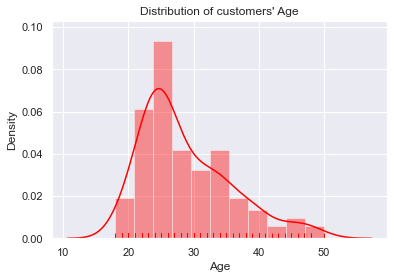

In [14]:
dist('Age')

- Right skew Distribution with it's peak at age from 24 to 26.

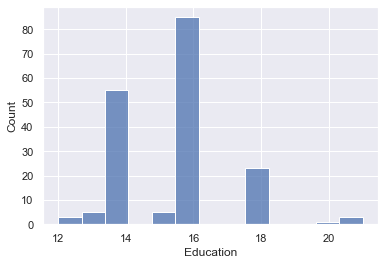

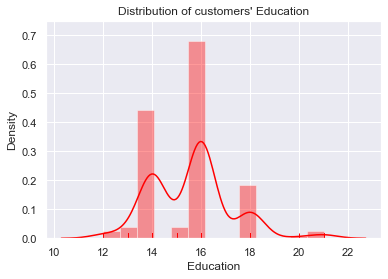

In [15]:
sns.histplot(customers['Education'])
plt.show()
dist('Education')
plt.show()

- Median and Mode of Customers' Education years are 16.

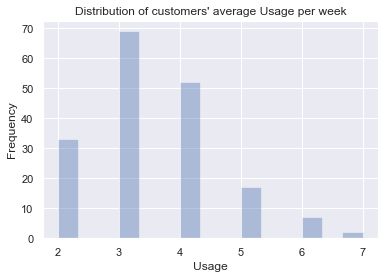

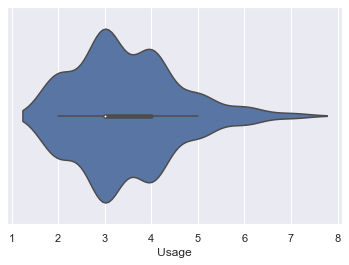

In [16]:
sns.distplot(customers['Usage'],kde=False); # histogram without KDE.
plt.title("Distribution of customers' average Usage per week")
plt.ylabel('Frequency')
plt.show()
sns.violinplot(customers['Usage']); # plot the distribution as a violin.
plt.show()

- Usage whiskers start from 2 to 5 times per week with quartiles at 3 and 4 .

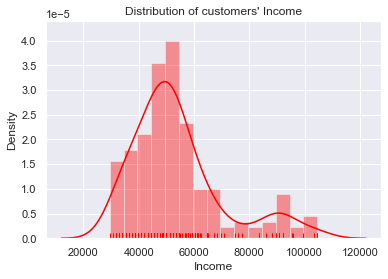

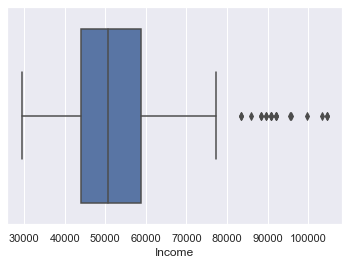

In [17]:
dist('Income')
plt.show()
sns.boxplot(data=customers, x='Income') # to find the outliers.
plt.show()

- Right-skewed Distribution of Income with a lot of Outliers at the end after 80,000.
- the median of Income is at 50,000.

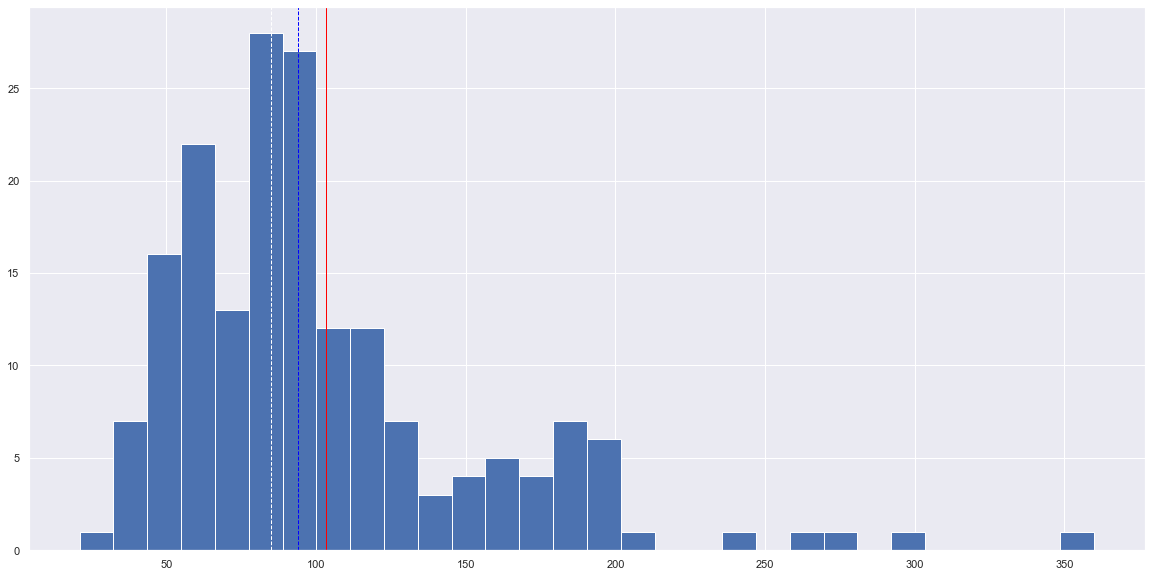

In [18]:
plt.figure(figsize=(20,10))
plt.hist(customers['Miles'],bins=30)
plt.axvline(customers['Miles'].mean(), color='red', linewidth=1)
plt.axvline(customers['Miles'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(customers['Miles'].mode()[0], color='white', linestyle='dashed', linewidth=1)

- Right-skewed Distribution of Miles with mode 85, median 94, and mean 103.
- Outliers are after 200

In [19]:
# for categorical Variables will use countplot
def count(col):
    sns.countplot(customers[col])

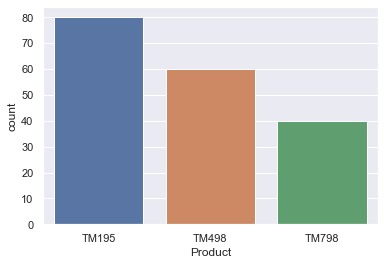

In [20]:
count('Product')

- Model TM195 has the highest count.

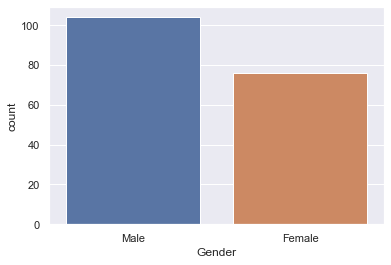

In [21]:
count('Gender')

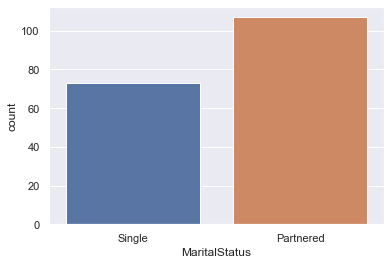

In [22]:
count('MaritalStatus')

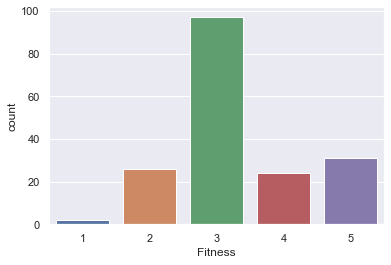

In [23]:
# Fitness score rate is qualitative data as it is rating from 1 to 5.
count('Fitness')

- Males are more than the females, also most of the customers are Partenered.
- Most of the customers have Fitness score rate 3.

### Multivariate Data Analysis
- Analysis of interaction between features, in the dataset

#### Interaction between Education and Income

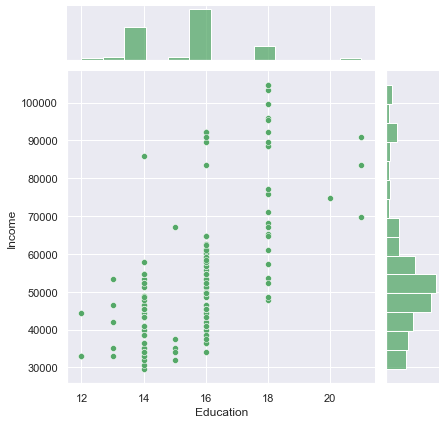

In [24]:
# Bivariate Distribution between 2 Numerival variables 
sns.jointplot(data = customers, x = 'Education', y = 'Income',color='g');

- The average of the customers have 14 and 16 years of Education with Income up to 60,000.
- The highest income is for customers with 18 years of Education.

#### Interaction between Age and Miles

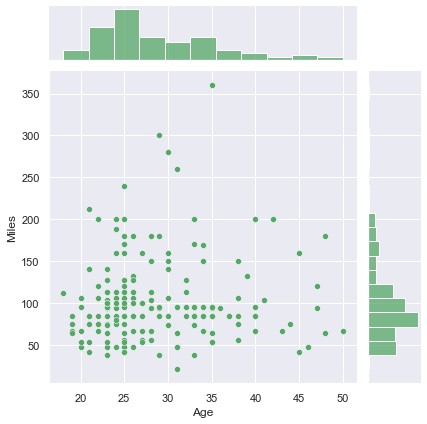

In [25]:
sns.jointplot(data = customers, x = 'Age', y = 'Miles',color='g');

- The average of the Customers are in their twentith and they are expected to run up to 200 Miles.
- The Customer with the highest expected Miles (more than 350) is 35 years old.

#### Interaction between Age, Miles and Income

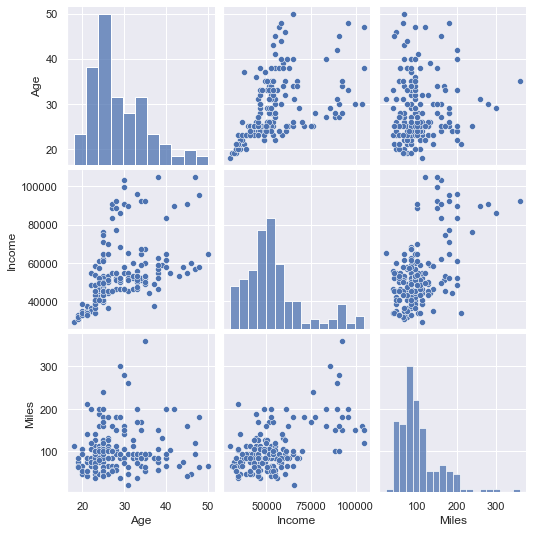

In [26]:
sns.pairplot(customers[['Age','Income','Miles']]);

- Income has a positive correlation with both Age and Miles.

In [27]:
customers.corr()

,Age,Education,Usage,Income,Miles
Age,1.000000,0.280496,0.015064,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.519537,0.759130
Income,0.513414,0.625827,0.519537,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.543473,1.000000


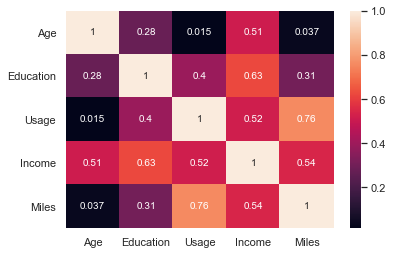

In [28]:
# plot the correlation coefficients as a heatmap
sns.heatmap(customers.corr(), annot=True);

- The highest correlation between Usage and Miles = 0.76
- then the correlation between Income and Education = 0.63

### Linear Regression Model between Usage and Miles by Gender

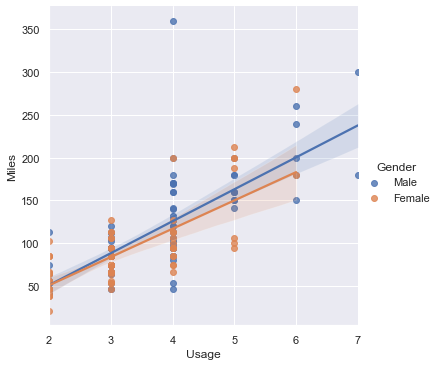

In [29]:
sns.lmplot(y='Miles',x='Usage',hue='Gender',
           data=customers);

- Linear regression between Usage and Miles with both Male and Female, reaches the maximum with the model of Male.

In [30]:
customers.groupby(['Gender'])['Usage'].mean().reset_index()

,Gender,Usage
0,Female,3.184211
1,Male,3.653846


In [31]:
customers.groupby(['MaritalStatus'])['Usage'].mean().reset_index()

,MaritalStatus,Usage
0,Partnered,3.448598
1,Single,3.465753


- Males average Usage per week  are higher than Females.
- Both Single and Partnered have close values of Usage.

###  what are the differences between customers of each product?

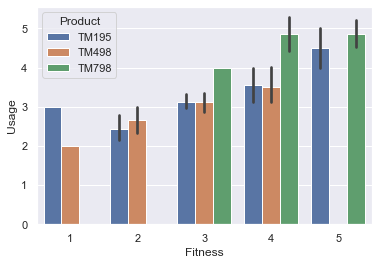

In [32]:
sns.barplot(customers['Fitness'],customers['Usage'],hue=customers['Product']);

- Fitness score rate and the average Usage per week have their highest values with product Model no. TM798 which range from score 3 to 5 with Usage up to 4, and 5.
- Product model no. TM498 has the Fitness score up to 4 not 5.

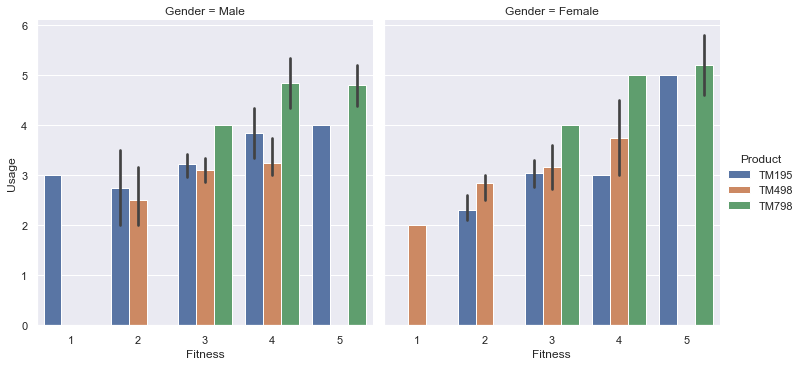

In [33]:
# Multivariate Visualisation between 3 categorical variables and 1 Numerical.
sns.catplot(x='Fitness',y='Usage',hue='Product',col='Gender', data=customers, kind='bar');

- Both Female and Male with fitness score rate (3,4,5) use the TM798 product the most with absence of Model TM498 at score rate 5.
- Males with Fitness score (1,2) prefer Model TM195
- Females with Fitness score (1,2) prefer Model TM498

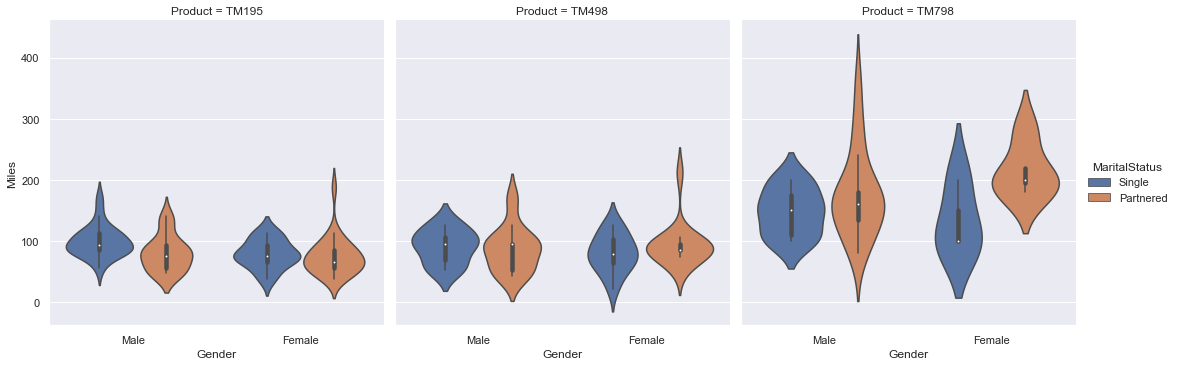

In [34]:
sns.catplot(x='Gender',y='Miles',hue='MaritalStatus',col='Product', data=customers, kind='violin');

- Partenered Male Customers expected to run the highest Miles with Product TM798.
- Product Model TM798 has the highest Miles in all cases than the 2 other Models. 

### Conclusion and Recommendations
- Product Model TM798 has the highest Miles in all cases. 
- Partenered Customers expected to run the highest Miles with the 3 products.
- Linear regression between Usage and Miles with both Male and Female, reaches the maximum with the model of Male.
- The average of the Customers are in their twentith and they are expected to run up to 200 Miles.

##### should investigate why  : 
- the first two models are not prefered to be used by customers with high Fitness Score rate.
- should investigate also why there is abscence of  Model TM498 at score rate 5.
- Males with Fitness score (1,2) prefer Model TM195
- Females with Fitness score (1,2) prefer Model TM498